# Supplementary notebook for 
## "The roles of kinetic asymmetry and ‘power strokes’ in an information ratchet"

Lorna Binks$^1$, Stefan Borsley$^1$, David A. Leigh$^{1,\ast}$, Todd R. Gingrich$^2$, Emanuele Penocchio$^2$ and
Benjamin M. W. Roberts$^1$

1) Department of Chemistry, University of Manchester, Oxford Road, Manchester, M13 9PL, UK

2) Department of Chemistry, Northwestern University, 2145 Sheridan Road, Evanston, IL 60208, USA

$\ast$) david.leigh@manchester.ac.uk

This notebook allows to retrieve data in Table 2 for arbitrary values of $K_\mathrm{r}$ and $K_\mathrm{Eq}$ and reproduce Figure 5C for arbitrary values of $K_\mathrm{r}$. Without loss of generality, the total concentration of ratchets is set to $[n]_0 = 1M$.

Each box of code is accompained by a brief description and can be executed by clicking on it and pressing Shift+Enter.

### Libraries and physical parameters

The following box of code imports the python libraries that are neccessary for running the following boxes and defines the useful physical parameters. The following versions are recommended:
- Python (>= v3.7)
- NumPy (>= v1.16)
- Matplotlib (>= v3.4)

Execute the following box by clicking on it and pressing Shift+Enter before proceeding.

In [5]:
%matplotlib inline 

# Libraries and Modules
import math 
import matplotlib.pyplot as plt
import numpy as np
from numpy import *

## Parameters

#physical
kb     = 1.38064852e-23   # [J/K]
Na     = 6.02214086e23    # [1/mol]
R      = kb*Na/1000       # [kJ/K*mol]
T      = 293.15              # [K]

### Functions

The following box of code defines the functions that compute the quantities required for generating the data in Table 2 and Figure 5C.

Execute the following box by clicking on it and pressing Shift+Enter before proceeding.

In [2]:
def ratios(Kr,Ke):
    '''
    Inputs: ratcheting constant (Kr), equilibrium constants (Ke).
    Outputs: equilibrium concentrations (proximal and distal), steady state concentrations (proximal and distal). 
    '''
    peq = 1/(1+Ke); deq = Ke/(1+Ke); pss = 1/(1+Ke*Kr); dss = Ke*Kr/(1+Ke*Kr)
    
    return peq, deq, pss, dss

def information(Kr,Ke):
    '''
    Input: ratcheting constant (Kr), equilibrium constants (Ke).
    Output: free energy stored as information at steady state in kJ/mol units.
    '''
    
    peq, deq, pss, dss = ratios(Kr,Ke)
    
    info = - peq*log(peq) - deq*log(deq) + pss*log(pss) + dss*log(dss)
    
    return R*T*info

def binding(Kr,Ke):
    '''
    Input: ratcheting constant (Kr), equilibrium constants (Ke).
    Output: free enregy stored as binding free energy at steady state in kJ/mol units.
    '''
    
    peq, deq, pss, dss = ratios(Kr,Ke)
    
    benergy = R*T*(dss-deq)*log(1/Ke)
    
    return benergy

def freeenergy(Kr,Ke):
    '''
    Input: ratcheting constant (Kr), equilibrium constants (Ke).
    Output: total free energy at steady state in kJ/mol units.
    '''
    
    fenergy = binding(Kr,Ke) + information(Kr,Ke)
    
    return fenergy

def figuregen(Kr):
    '''
    Input: ratcheting constant (Kr).
    Output: 
    - KM, array with 10^4 values for the equilibrium constant spaced evenly on a log scale between 10^-3 and 10^3;
    - FREEENERGY, BINDING, INFORMATION: arrays with thermodynamic functions computed for each value in KM. 
    '''
    FREEENERGY =[]; BINDING=[]; INFORMATION=[]
    KM = np.geomspace(0.001,1000,num=10000)
    for i in KM:
        FREEENERGY.append(freeenergy(Kr,i))
        BINDING.append(binding(Kr,i))
        INFORMATION.append(information(Kr,i))
    return KM, FREEENERGY, BINDING, INFORMATION

def figureplot(PS, DG, DB, DI,Kr):
    '''
    Function generating Figure 5C.
    Input:
    - arrays with ordered values for equilibrium constant, free energy, binding energy, and information stored;
    - ratcheting constant (Kr).
    '''
    
    plt.plot(PS,DB, label='Binding free \n energy', color='#BFA949')
    plt.plot(PS,DI, label='Information', color = '#D72877')
    plt.plot(PS,DG, label= 'Total free \n energy', color = '#6336B4')
    plt.xscale('log')
    plt.legend(fontsize=12)
    plt.axvline(x = 1, color = 'black', linestyle='--')
    plt.axhline(y = 0, color = 'black', linestyle='--')
    #plt.axhline(y = 1.69, color = 'black', linestyle='--')
    #plt.axvline(x = 0.8, color = 'b', linestyle='--')
    #plt.axvline(x = 0.55, color = 'b', linestyle='--')
    plt.title('Energetics for Kr = %s'%Kr, size=20)
    plt.xlabel('Keq \n ([dist-n]eq / [prox-n]eq)', size=20)
    plt.ylabel('Energy \n (kJ/mol)', size=20)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.xlim(left=1e-3, right=1e3)
    #plt.savefig("images/storage_200.png", bbox_inches='tight', dpi=300)
    plt.show()
    
def interestingpoints(PS, DG, DB, DI,Kr):
    '''
    Function computing and printing relevant points in figure 5C.
    Input:
    - arrays with ordered values for equilibrium constant, free energy, binding energy, and information stored;
    - ratcheting constant (Kr).
    '''
    
    noinf = 1/sqrt(Kr); pnoinf = 1/(1+noinf); dnoinf = noinf/(1+noinf)
    maxinf = PS[np.argmax(np.array(DI))]; pmaxinf = 1/(1+maxinf); dmaxinf = maxinf/(1+maxinf)
    maxbin = PS[np.argmax(np.array(DB))]; pmaxbin = 1/(1+maxbin); dmaxbin = maxbin/(1+maxbin)
    maxfen = PS[np.argmax(np.array(DG))]; pmaxfen = 1/(1+maxfen); dmaxfen = maxfen/(1+maxfen)
    
    print('Information equals zero for Keq = ',
          "{:.3f}".format(noinf), '(',"{:.0f}".format(pnoinf*100),':',"{:.0f}".format(dnoinf*100), ')')
    print('Information is maximum for Keq = ', 
          "{:.3f}".format(maxinf), '(',"{:.0f}".format(pmaxinf*100),':',"{:.0f}".format(dmaxinf*100), ')')
    print('Binding free energy is maximum for Keq = ', 
          "{:.3f}".format(maxbin), '(',"{:.0f}".format(pmaxbin*100),':',"{:.0f}".format(dmaxbin*100), ')')
    print('Free energy is maximum for Keq = ', 
          "{:.3f}".format(maxfen), '(',"{:.0f}".format(pmaxfen*100),':',"{:.0f}".format(dmaxfen*100), ')')
    
def data(Kr,Ke):
    '''
    Functions printing a line of Table 2
    Input: ratcheting constant (Kr), equilibrium constants (Ke).
    '''
    
    peq, deq, pss, dss = ratios(Kr,Ke)
    DBstd = R*T*log(1/Ke)
    MM = dss - deq
    DG = freeenergy(Kr,Ke); DI = information(Kr,Ke); DB = binding(Kr,Ke)
    
    print('For Kr = %s'%Kr,'and KEq = %s:'%Ke)
    print('The equilibrium ratio (prox-n:dist-n) is', '(',"{:.0f}".format(peq*100),':',"{:.0f}".format(deq*100), ')')
    print("The steady state ratio (prox-n':dist-n') is'", '(',"{:.0f}".format(pss*100),':',"{:.0f}".format(dss*100), ')')
    print('The binding energy difference between stations is', "{:.2f}".format(DBstd), 'kJ/mol')
    print('The number of macrocycles moved is', "{:.0f}".format(MM*100), '%')
    print('The total free energy stored is', "{:.2f}".format(DG), 'kJ/mol')
    print('The total free energy stored in form of information is', "{:.2f}".format(DI), 'kJ/mol')
    print('The total free energy stored in form of binding free energy is', "{:.2f}".format(DB), 'kJ/mol')

### Getting data in Table 2 for any value of $K_\mathrm{r}$ and $K_\mathrm{Eq}$

To get the data reported in Table 2 for arbitrary combinations of $K_\mathrm{r}$ and $K_\mathrm{Eq}$, change the values of the Kr variable (encoding $K_\mathrm{r}$) and the Ke variable (encoding $K_\mathrm{Eq}$) in the first line of the next code box and then run the box with Shift+Enter.

In [3]:
Kr = 20.6; Ke = 1

data(Kr,Ke)

For Kr = 20.6 and KEq = 1:
The equilibrium ratio (prox-n:dist-n) is ( 50 : 50 )
The steady state ratio (prox-n':dist-n') is' ( 5 : 95 )
The binding energy difference between stations is 0.00 kJ/mol
The number of macrocycles moved is 45 %
The total free energy stored is 1.25 kJ/mol
The total free energy stored in form of information is 1.25 kJ/mol
The total free energy stored in form of binding free energy is 0.00 kJ/mol


### Plotting Figure 5C for arbitray $K_\mathrm{r}$

To reproduce Figure 5C for arbitrary values of $K_\mathrm{r}$, change the value of the Kr variable in the first line of the next code box and then run the box with Shift+Enter. The value of $K_\mathrm{Eq}$ corresponding to the curves' maxima and the point where information stores is null are identified. 

Information equals zero for Keq =  0.220 ( 82 : 18 )
Information is maximum for Keq =  1.536 ( 39 : 61 )
Binding free energy is maximum for Keq =  0.065 ( 94 : 6 )
Free energy is maximum for Keq =  0.125 ( 89 : 11 )


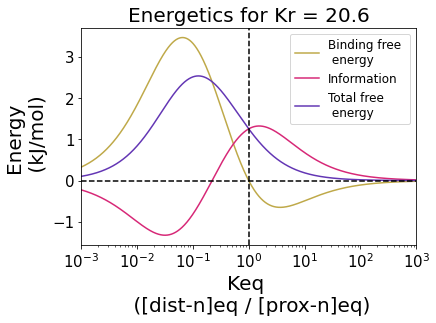

In [4]:
Kr = 20.6
PS, DG, DB, DI = figuregen(Kr)
interestingpoints(PS, DG, DB, DI, Kr)
figureplot(PS, DG, DB, DI,Kr)